# Created by Jack Foley - C00274246
## Thyroid dataset, decision tree classifier.  
The main difference between this dataset and the diabetes dataset is that this dataset is nearly all categorical data rather than integer data. The diabetes dataset is all integer data, so we didn't have to do any mapping of values to integers for that. For this dataset however, we have to map the categorical data to integer data using the map function from Pandas. This allows for the decision tree classifier model to work correctly.

   Age Gender Smoking Hx Smoking Hx Radiothreapy Thyroid Function  \
0   27      F      No         No              No        Euthyroid   
1   34      F      No        Yes              No        Euthyroid   
2   30      F      No         No              No        Euthyroid   
3   62      F      No         No              No        Euthyroid   
4   62      F      No         No              No        Euthyroid   

          Physical Examination Adenopathy       Pathology     Focality Risk  \
0   Single nodular goiter-left         No  Micropapillary    Uni-Focal  Low   
1          Multinodular goiter         No  Micropapillary    Uni-Focal  Low   
2  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
3  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
4          Multinodular goiter         No  Micropapillary  Multi-Focal  Low   

     T   N   M Stage       Response Recurred  
0  T1a  N0  M0     I  Indeterminate       No  
1  T1a  N0  M0  

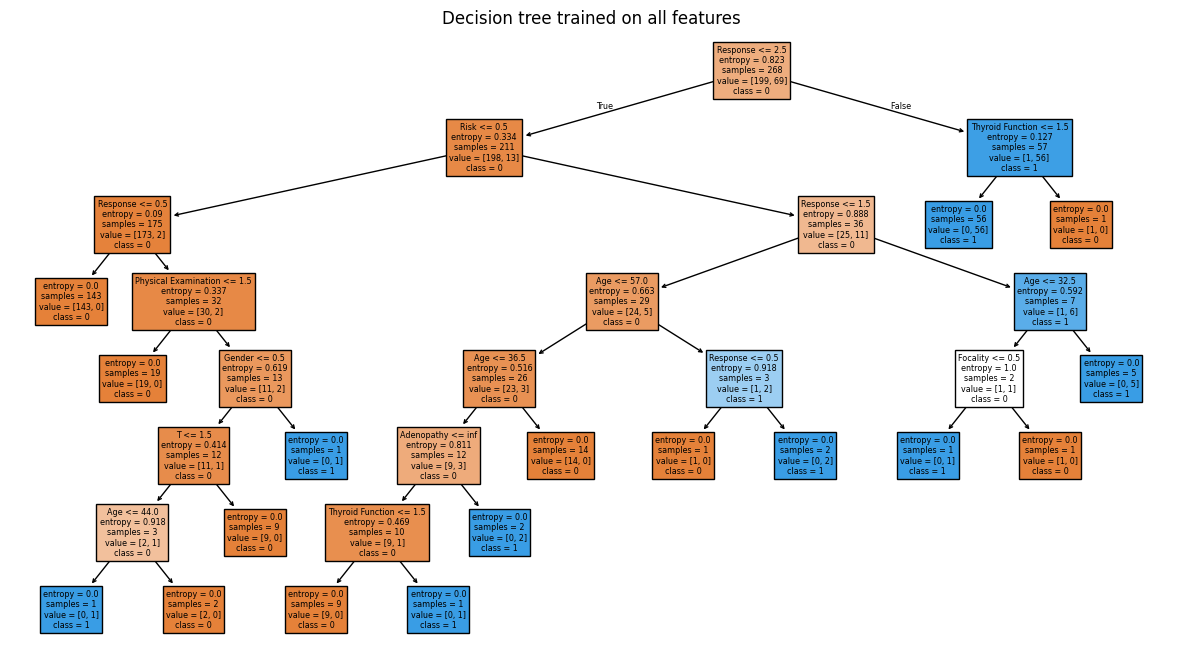

In [ ]:
#If running in jupyter notebook you need to be able to use your virtual environment.
#First:
#pip install ipython
#ipython kernel install --user --name=aiinthewild
#This allows you use the virtual environment in jupyter notebook by selecting Kernel->Change Kernel

# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

pima = pd.read_csv("Thyroid_Diff.csv")
print(pima.head())

# convert categorical columns to numerical values
pima['Gender'] = pima['Gender'].map({'M': 1, 'F': 0})
pima['Smoking'] = pima['Smoking'].map({'Yes': 1, 'No': 0})
pima['Hx Smoking'] = pima['Hx Smoking'].map({'Yes': 1, 'No': 0})
pima['Hx Radiothreapy'] = pima['Hx Radiothreapy'].map({'Yes': 1, 'No': 0})
pima['Thyroid Function'] = pima['Thyroid Function'].map({'Euthyroid': 0, 'Clinical Hyperthyroidism': 2, 'Subclinical Hypothyroidism': 1})
pima['Physical Examination'] = pima['Physical Examination'].map({'Single nodular goiter-left': 0, 'Single nodular goiter-right': 1, 'Multinodular goiter': 2, 'Normal': 3})
pima['Adenopathy'] = pima['Adenopathy'].map({'No': 0, 'Right': 1, 'Extensive': 2, 'Bilateral': 3})
pima['Pathology'] = pima['Pathology'].map({'Micropapillary': 0, 'Papillary': 1, 'Hurthel cell': 2})
pima['Focality'] = pima['Focality'].map({'Uni-Focal': 0, 'Multi-Focal': 1})
pima['Risk'] = pima['Risk'].map({'Low': 0, 'Intermediate': 1, 'High': 2})
pima['T'] = pima['T'].map({'T1a': 0, 'T1b': 1, 'T2': 2, 'T3a': 3, 'T3b': 4, 'T4a': 5, 'T4b': 6})
pima['N'] = pima['N'].map({'N0': 0, 'N1a': 1, 'N1b': 2})
pima['M'] = pima['M'].map({'M0': 0, 'M1': 1})
pima['Stage'] = pima['Stage'].map({'I': 0, 'II': 1, 'III': 2, 'IVA': 3, 'IVB': 4})
pima['Response'] = pima['Response'].map({'Excellent': 0, 'Indeterminate': 1, 'Biochemical Incomplete': 2, 'Structural Incomplete': 3})
pima['Recurred'] = pima['Recurred'].map({'No': 0, 'Yes': 1})

#split dataset in features and target variable
target = pima['Recurred']
features = pima.drop('Recurred', axis=1)
X = features # Features
y = target # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
#print(X_train)
#print(X_test)

# Create Decision Tree classifer object using information gain as the splitting criteria.
clf = DecisionTreeClassifier(criterion='entropy')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
#Lets print out the first few rows of the test data.
print("Testing:")
print(X_test.head())
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#If using a jupyter notebook
#from sklearn.tree import export_graphviz
#import graphviz

#data = export_graphviz(clf, out_file=None,  
#                filled=True, rounded=True,
#                special_characters=True,
#                max_depth=3, 
#                feature_names = feature_cols,class_names=['0','1'])
#graph = graphviz.Source(data, format='png')
#graph

#Otherwise in normal python you can use matplotlib (you will need to pip install it):
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(15,8))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['0','1'])
plt.title("Decision tree trained on all features")
plt.show()